In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy
%timeit numpy.sqrt(numpy.ones((400, 400)))

1000 loops, best of 3: 1.19 ms per loop


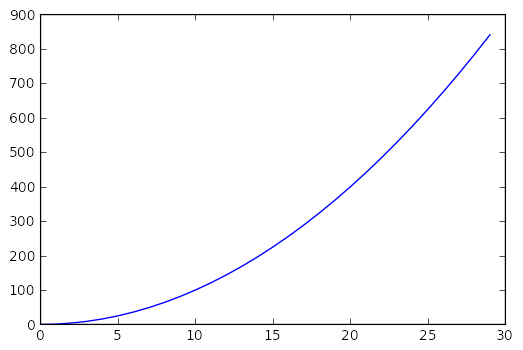

In [3]:
values = numpy.arange(30)**2
plt.plot(values)

In [4]:
t1 = numpy.linspace(0,1,5).reshape((1, 5))
t2 = numpy.linspace(1,3,3).reshape((3, 1))
print(t1)
print(t2)
t1 + t2*1j

[[ 0.    0.25  0.5   0.75  1.  ]]
[[ 1.]
 [ 2.]
 [ 3.]]


array([[ 0.00+1.j,  0.25+1.j,  0.50+1.j,  0.75+1.j,  1.00+1.j],
       [ 0.00+2.j,  0.25+2.j,  0.50+2.j,  0.75+2.j,  1.00+2.j],
       [ 0.00+3.j,  0.25+3.j,  0.50+3.j,  0.75+3.j,  1.00+3.j]])

In [5]:
m = 600 # Height of plot
n = 600 # Width of plot
values_real = numpy.linspace(-2.3, 1, n).reshape((1,n))
values_imag = numpy.linspace(-1.4, 1.4, m).reshape((m,1))
initial_values = values_real + values_imag*1j
initial_values

array([[-2.30000000-1.4j       , -2.29449082-1.4j       ,
        -2.28898164-1.4j       , ...,  0.98898164-1.4j       ,
         0.99449082-1.4j       ,  1.00000000-1.4j       ],
       [-2.30000000-1.39532554j, -2.29449082-1.39532554j,
        -2.28898164-1.39532554j, ...,  0.98898164-1.39532554j,
         0.99449082-1.39532554j,  1.00000000-1.39532554j],
       [-2.30000000-1.39065109j, -2.29449082-1.39065109j,
        -2.28898164-1.39065109j, ...,  0.98898164-1.39065109j,
         0.99449082-1.39065109j,  1.00000000-1.39065109j],
       ..., 
       [-2.30000000+1.39065109j, -2.29449082+1.39065109j,
        -2.28898164+1.39065109j, ...,  0.98898164+1.39065109j,
         0.99449082+1.39065109j,  1.00000000+1.39065109j],
       [-2.30000000+1.39532554j, -2.29449082+1.39532554j,
        -2.28898164+1.39532554j, ...,  0.98898164+1.39532554j,
         0.99449082+1.39532554j,  1.00000000+1.39532554j],
       [-2.30000000+1.4j       , -2.29449082+1.4j       ,
        -2.28898164+1.4j     

c:\Python27\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: overflow encountered in multiply
c:\Python27\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in multiply
c:\Python27\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in square
c:\Python27\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in square
c:\Python27\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in greater


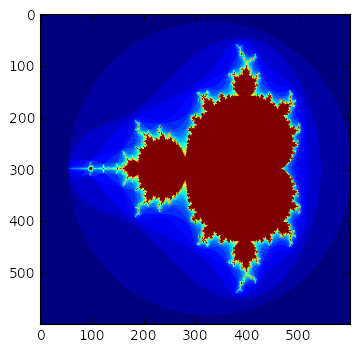

In [6]:
values = initial_values
max_iterations = 30
iterations = numpy.ones(initial_values.shape) * max_iterations
for i in range(max_iterations) :
    values = values**2 + initial_values
    divergent = values * numpy.conj(values) > 4
    divergent = divergent & (iterations == max_iterations) # Test that we haven't already found this number
    iterations[divergent] = i
plt.imshow(iterations)

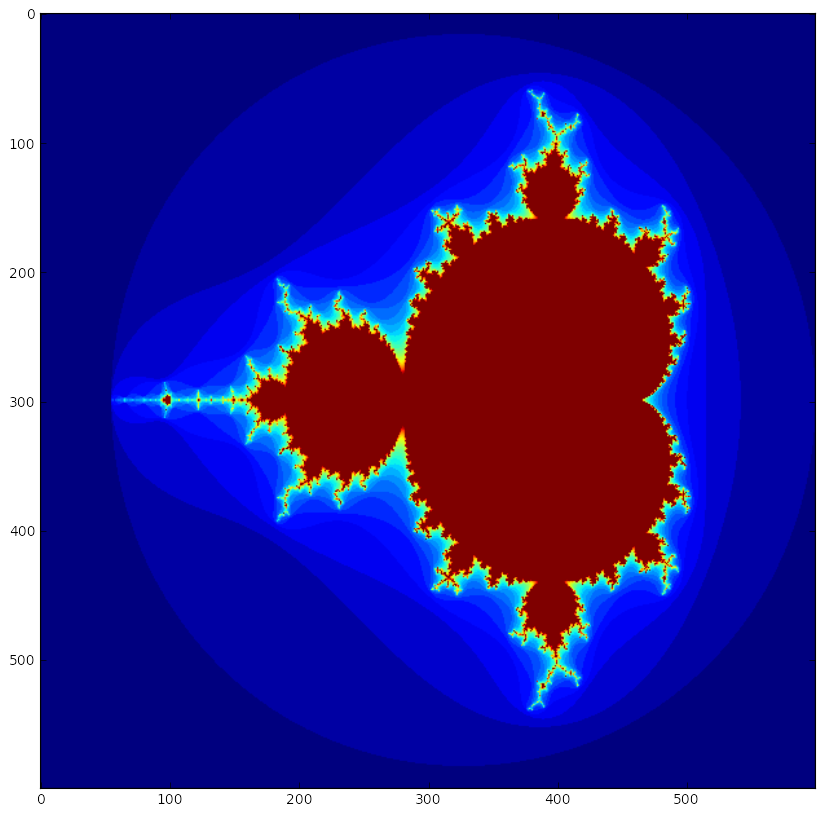

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
plt.imshow(iterations)

In [8]:
def mandelbrot(width, height, x_lim = (-2.3, 1), y_lim = (-1.4, 1.4), max_iterations = 30) :
    m = height # Height of plot
    n = width # Width of plot
    values_real = numpy.linspace(x_lim[0], x_lim[1], n).reshape((1,n))
    values_imag = numpy.linspace(y_lim[0], y_lim[1], m).reshape((m,1))
    initial_values = values_real + values_imag*1j
    initial_values
    values = initial_values
    iterations = numpy.ones(initial_values.shape) * max_iterations
    for i in range(max_iterations) :
        values = values**2 + initial_values
        divergent = values * numpy.conj(values) > 4
        divergent = divergent & (iterations == max_iterations) # Test that we haven't already found this number
        iterations[divergent] = i
    return iterations

c:\Python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in multiply
c:\Python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in multiply
c:\Python27\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in square
c:\Python27\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: invalid value encountered in square
c:\Python27\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in greater


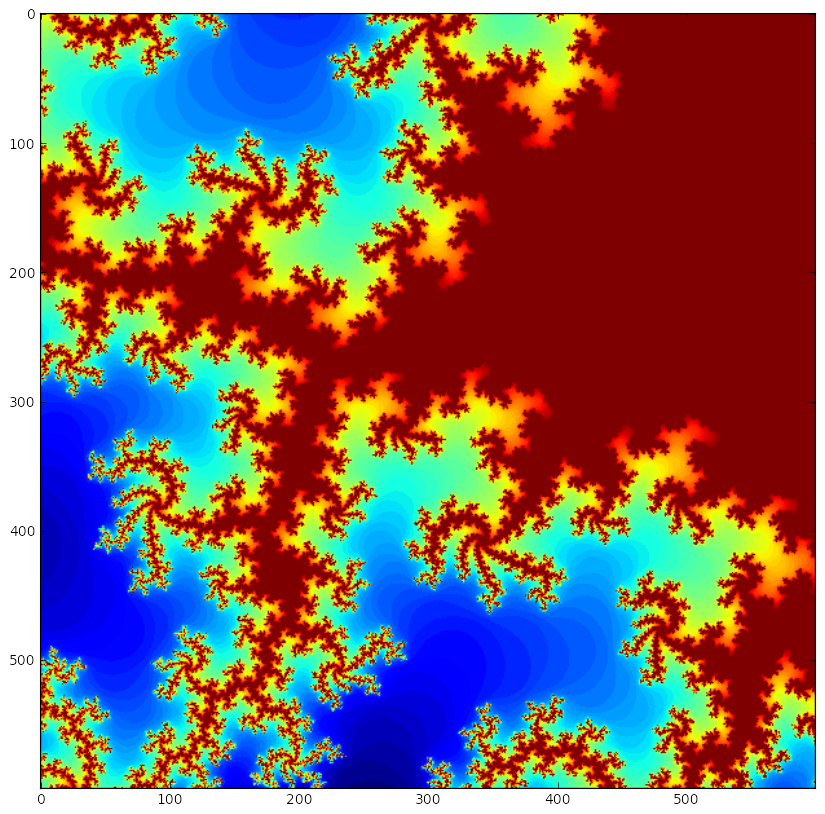

In [9]:
mandelbrot_data = mandelbrot(600, 600, (-0.56, -0.55), (-0.56,-0.55), 90)
plt.imshow(mandelbrot_data)

The Mandelbrot set is a mathematical set of points whose boundary is a distinctive and easily recognizable two-dimensional fractal shape. The set is closely related to Julia sets (which include similarly complex shapes) and is named after the mathematician Benoit Mandelbrot, who studied and popularized it.

Mandelbrot set images are made by sampling complex numbers and determining for each whether the result tends towards infinity when a particular mathematical operation is iterated on it. Treating the real and imaginary parts of each number as image coordinates, pixels are colored according to how rapidly the sequence diverges, if at all.

More precisely, the Mandelbrot set is the set of values of c in the complex plane for which the orbit of 0 under iteration of the complex quadratic polynomial zn+1=z2n+c remains bounded.
